# Car Evaluation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## ZeroR Classifier

In [4]:
file_path = '/content/drive/MyDrive/cse-445/Assignment-4/car+evaluation/car.data'
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(file_path, header=None, names=column_names)
df.sample(5)

,buying,maint,doors,persons,lug_boot,safety,class
1323,low,vhigh,3,2,small,low,unacc
881,med,vhigh,2,4,big,high,acc
1289,med,low,5more,more,small,high,good
979,med,high,2,2,big,med,unacc
133,vhigh,high,2,more,big,med,unacc


In [5]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


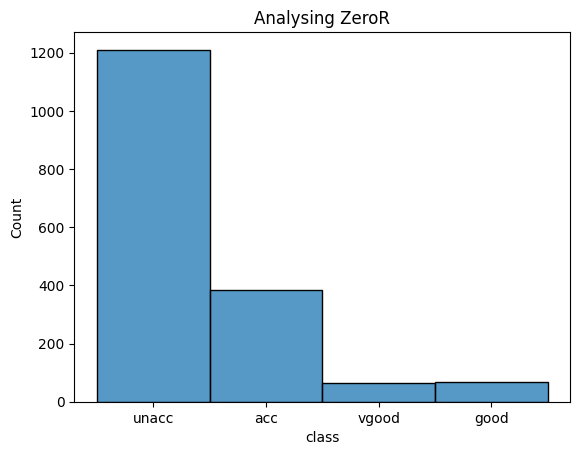

In [6]:
sns.histplot(data=df, x='class', bins=3, kde=False)
plt.title("Analysing ZeroR")
plt.show()

In [7]:
X = df.drop('class', axis=1)
y = df['class']
#Train
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
#Test and eval
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (1209, 6)
Validation: (259, 6)
Test: (260, 6)


In [8]:
most_common_class = y_train.mode()[0]
print("ZeroR always predicts:", most_common_class)
y_val_predZeroR = [most_common_class] * len(y_val)
y_test_predZeroR = [most_common_class] * len(y_test)
val_accuracyZeroR = accuracy_score(y_val, y_val_predZeroR)
test_accuracyZeroR = accuracy_score(y_test, y_test_predZeroR)

print(f"Validation Accuracy: {val_accuracyZeroR:.2f}")
print(f"Test Accuracy: {test_accuracyZeroR:.2f}")

ZeroR always predicts: unacc
Validation Accuracy: 0.70
Test Accuracy: 0.70


## OneR Classifier

In [9]:
!pip install mlxtend

In [10]:
from mlxtend.classifier import OneRClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

X_train_encoded = X_train.apply(LabelEncoder().fit_transform)
X_val_encoded = X_val.apply(LabelEncoder().fit_transform)
y_train_encoded = LabelEncoder().fit_transform(y_train)
y_val_encoded = LabelEncoder().fit_transform(y_val)
X_test_encoded = X_test.apply(LabelEncoder().fit_transform)
y_test_encoded = LabelEncoder().fit_transform(y_test)

X_train_np = X_train_encoded.to_numpy()
X_val_np = X_val_encoded.to_numpy()
X_test_np = X_test_encoded.to_numpy()

oner = OneRClassifier()
oner.fit(X_train_np, y_train_encoded)

y_val_predOneR = oner.predict(X_val_np)
y_test_predOneR = oner.predict(X_test_np)

print(f"OneR best feature: {oner.feature_idx_}")
print(f"Validation Accuracy: {accuracy_score(y_val_encoded, y_val_predOneR):.2f}")
print(f"Test Accuracy: {accuracy_score(y_test_encoded, y_test_predOneR):.2f}")

OneR best feature: 0
Validation Accuracy: 0.70
Test Accuracy: 0.70


## Naive Bayes Classifier

In [11]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report
nb_classifier = CategoricalNB()
nb_classifier.fit(X_train_encoded, y_train_encoded)
y_val_pred_nb = nb_classifier.predict(X_val_encoded)
y_test_pred_nb = nb_classifier.predict(X_test_encoded)
print("Validation Accuracy:", accuracy_score(y_val_encoded, y_val_pred_nb))
print("\nClassification Report:\n", classification_report(y_val_encoded, y_val_pred_nb))

Validation Accuracy: 0.861003861003861

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68        57
           1       0.57      0.36      0.44        11
           2       0.92      0.97      0.95       181
           3       1.00      0.40      0.57        10

    accuracy                           0.86       259
   macro avg       0.79      0.61      0.66       259
weighted avg       0.86      0.86      0.85       259



## KNeighbors Classifier

In [12]:
X_train_enc = X_train.copy()
X_val_enc = X_val.copy()
X_test_enc = X_test.copy()
encoders = {}

for col in X_train.columns:
    le = LabelEncoder()
    X_train_enc[col] = le.fit_transform(X_train[col])
    X_val_enc[col] = le.transform(X_val[col])  # Use same encoder
    X_test_enc[col] = le.transform(X_test[col])
    encoders[col] = le


In [13]:
# Encode class labels
le_y = LabelEncoder()

y_train_enc = le_y.fit_transform(y_train)
y_val_enc = le_y.transform(y_val)
y_test_enc = le_y.transform(y_test)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_enc, y_train_enc)

y_val_predKN = knn.predict(X_val_enc)
val_accuracyKN = accuracy_score(y_val_encoded, y_val_predKN)
print(f"Validation Accuracy (K=3): {val_accuracyKN:.2f}")

y_test_predKN = knn.predict(X_test_enc)
test_accuracyKN = accuracy_score(y_test_encoded, y_test_predKN)
print(f"Test Accuracy (K=3): {test_accuracyKN:.2f}")

Validation Accuracy (K=3): 0.82
Test Accuracy (K=3): 0.80


## SVM: Support Vector Machine

In [15]:
from sklearn.svm import SVC

In [16]:
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_np, y_train_encoded)

y_val_predSVM = svm_clf.predict(X_val_np)
val_accuracySVM = accuracy_score(y_val_encoded, y_val_predSVM)
print(f"SVM Val  Accuracy: {val_accuracySVM:.2f}")

y_test_predSVM = svm_clf.predict(X_test_np)
test_accuracySVM = accuracy_score(y_test_encoded, y_test_predSVM)
print(f"SVM Test Accuracy: {test_accuracySVM:.2f}")

SVM Val  Accuracy: 0.92
SVM Test Accuracy: 0.88


## Evaluation

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=0)

    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Average Precision: {precision:.4f}")
    print(f"Average Recall: {recall:.4f}")
    print(f"Average F-score: {fscore:.4f}")
    print()


In [19]:
y_val_predZeroR_encoded = le_y.transform(y_val_predZeroR)
evaluate_model('ZeroR', y_val_enc, y_val_predZeroR_encoded)
evaluate_model('OneR', y_val_enc, y_val_predOneR)
evaluate_model('Naive Bayes', y_val_enc, y_val_pred_nb)
evaluate_model('KNN', y_val_enc, y_val_predKN)
evaluate_model('SVM', y_val_enc, y_val_predSVM)
print("Now for test set ")
evaluate_model('ZeroR', y_test_encoded, le_y.transform(y_test_predZeroR))
evaluate_model('OneR', y_test_encoded, y_test_predOneR)
evaluate_model('Naive Bayes', y_test_encoded, y_test_pred_nb)
evaluate_model('KNN', y_test_encoded, y_test_predKN)
evaluate_model('SVM', y_test_encoded, y_test_predSVM)

--- ZeroR ---
Accuracy: 0.6988
Confusion Matrix:
[[  0   0  57   0]
 [  0   0  11   0]
 [  0   0 181   0]
 [  0   0  10   0]]
Average Precision: 0.4884
Average Recall: 0.6988
Average F-score: 0.5750

--- OneR ---
Accuracy: 0.6988
Confusion Matrix:
[[  0   0  57   0]
 [  0   0  11   0]
 [  0   0 181   0]
 [  0   0  10   0]]
Average Precision: 0.4884
Average Recall: 0.6988
Average F-score: 0.5750

--- Naive Bayes ---
Accuracy: 0.8610
Confusion Matrix:
[[ 39   3  15   0]
 [  7   4   0   0]
 [  5   0 176   0]
 [  6   0   0   4]]
Average Precision: 0.8574
Average Recall: 0.8610
Average F-score: 0.8528

--- KNN ---
Accuracy: 0.8185
Confusion Matrix:
[[ 38   0  19   0]
 [  8   3   0   0]
 [ 12   0 169   0]
 [  7   0   1   2]]
Average Precision: 0.8346
Average Recall: 0.8185
Average F-score: 0.8066

--- SVM ---
Accuracy: 0.9189
Confusion Matrix:
[[ 49   0   7   1]
 [  7   4   0   0]
 [  4   0 177   0]
 [  2   0   0   8]]
Average Precision: 0.9230
Average Recall: 0.9189
Average F-score: 0.9142


## Model Comparison

In [ ]:
model_accuracies = {
    'ZeroR': val_accuracyZeroR,
    'OneR': accuracy_score(y_val_encoded, y_val_predOneR),
    'Naive Bayes': accuracy_score(y_val_encoded, y_val_pred_nb),
    'KNeighbour': accuracy_score(y_val_encoded, y_val_predKN),
    'SVM': accuracy_score(y_val_encoded, y_val_predSVM)
}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Comparison (Vadidation Accuracy)')
plt.xlabel('Classifier')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.show()

In [ ]:
model_accuracies_test = {
    'ZeroR': test_accuracyZeroR,
    'OneR': accuracy_score(y_test_encoded, y_test_predOneR),
    'Naive Bayes': accuracy_score(y_test_encoded, y_test_pred_nb),
    'KNeighbour': accuracy_score(y_test_encoded, y_test_predKN),
    'SVM': accuracy_score(y_test_encoded, y_test_predSVM)
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies_test.keys()), y=list(model_accuracies_test.values()))
plt.title('Model Comparison (Test Accuracy)')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()